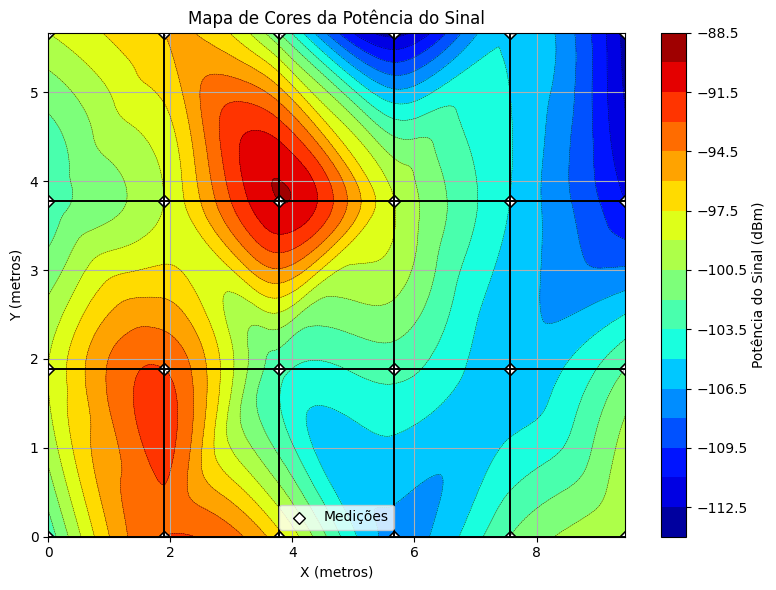

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Carregar os dados
df = pd.read_csv('/content/Document from David Melo (1).csv')

# Extrair coordenadas e RSSI (coordenadas já estão em metros)
x = df['Longitude'].values
y = df['Latitude'].values
z = df['rssi'].values

# Criar grade regular para interpolação (resolução reduzida)
xi = np.linspace(x.min(), x.max(), 1000)
yi = np.linspace(y.min(), y.max(), 1000)
xi, yi = np.meshgrid(xi, yi)

# Interpolação com método cúbico
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Gerar gráfico
plt.figure(figsize=(8, 6))
contorno = plt.contourf(xi, yi, zi, levels=20, cmap='jet')
plt.contour(xi, yi, zi, levels=20, colors='black', linewidths=0.3)
plt.colorbar(contorno, label='Potência do Sinal (dBm)')
plt.scatter(x, y, c='white', edgecolors='black', marker='D', label='Medições')

# Adicionar grade de quadrados a cada 1.63 metros
x_grid_lines = np.arange(x.min(), x.max(), 1.89)
y_grid_lines = np.arange(y.min(), y.max(), 1.89)
for xg in x_grid_lines:
    plt.axvline(x=xg, color='black', linestyle='-', linewidth=1.40)
for yg in y_grid_lines:
    plt.axhline(y=yg, color='black', linestyle='-', linewidth=1.40)

# Rótulos e título
plt.xlabel('X (metros)')
plt.ylabel('Y (metros)')
plt.title('Mapa de Cores da Potência do Sinal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()